# **Procesamiento de Lenguaje Natural**

## Maestría en Inteligencia Artificial Aplicada
#### Tecnológico de Monterrey
#### Prof Luis Eduardo Falcón Morales

### **Adtividad en Equipos: sistema LLM + RAG**

* **Nombres y matrículas:**

  * A00378771 - Hiram Garcia Austria
  * A01281536 - Joaquín Díaz Hernández
  * A01796568 - Jesús Antonio López Wayas
  * A01795624 - Victor Hugo Vázquez Herrera

* **Número de Equipo: 36**


# Problemática a resolver:

Crear un chatbot que responda preguntas sobre cómo invertir en la bolsa de valores utilizando un PDF# como fuente de información.

El chatbot debe ser capaz de responder preguntas específicas basadas en el contenido del PDF proporcionado.

El PDF contiene información sobre estrategias de inversión, análisis de mercado, y otros temas relevantes.

El chatbot debe ser fácil de usar y accesible a través de una interfaz gráfica.

El usuario debe poder escribir preguntas y recibir respuestas basadas en el contenido del PDF.

In [ ]:
# %pip install PyPDF2
# %pip install gradio transformers


   ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/232.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/232.6 kB 445.2 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/232.6 kB 880.9 kB/s eta 0:00:01
   ---------------------------- ----------- 163.8/232.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 232.6/232.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import gradio as gr
import os
from openai import OpenAI
from dotenv import load_dotenv
from PyPDF2 import PdfReader

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
open_ai = OpenAI(api_key=api_key)
modelo = "gpt-4o-mini"

In [ ]:
# Cargar el PDF y extraer su contenido
pdf_path = "Manual_Trader.pdf"

if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"El archivo {pdf_path} no se encuentra en el directorio actual.")

# Función para extraer el contenido del PDF
def extraer_contenido_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    texto = ""
    for page in reader.pages:
        texto += page.extract_text() + "\n"
    return texto

contenido_pdf = extraer_contenido_pdf(pdf_path)


In [ ]:
# Función para responder preguntas basadas en el contenido del PDF
def responder_pregunta(pregunta):
    prompt = f"Responde a la siguiente pregunta utilizando la información del PDF:\n\n{contenido_pdf}\n\nPregunta: {pregunta}\nRespuesta:"
    
    # Modelo de OpenAI que usa el método de chat completions
    respuesta = open_ai.chat.completions.create(
        model=modelo,
        messages=[{"role": "user", "content": prompt}],
    )
    
    return respuesta.choices[0].message.content.strip()

In [ ]:
# Interfaz gráfica con Gradio
with gr.Blocks() as demo:
    gr.Markdown("# Chatbot de Inversión en la Bolsa de Valores")
    gr.Markdown("Pregúntame sobre cómo invertir en la bolsa de valores.")
    
    with gr.Row():
        with gr.Column(scale=3):
            user_input = gr.Textbox(label="Pregunta", placeholder="Escribe tu pregunta aquí...")
        with gr.Column(scale=1):
            submit_button = gr.Button("Enviar")
    
    output = gr.Textbox(label="Respuesta", interactive=False)
    
    submit_button.click(responder_pregunta, inputs=user_input, outputs=output)

# Lanzar la interfaz
if __name__ == "__main__":
    demo.launch(share=True)  # share=True para compartir la interfaz públicamente

* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


# Cómo funciona el chatbot con un sistema RAG+LLM

El chatbot utiliza un enfoque de Recuperación y Generación (RAG) para responder preguntas sobre inversión en la bolsa de valores.

Primero, extrae el contenido del PDF que contiene información relevante sobre estrategias de inversión y análisis de mercado.

Luego, cuando el usuario hace una pregunta, el chatbot genera un prompt que incluye el contenido del PDF y la pregunta del usuario.

Utiliza el modelo GPT-4o-mini de OpenAI para generar una respuesta basada en ese prompt.

La respuesta se muestra en una interfaz gráfica creada con Gradio, donde el usuario puede escribir preguntas y recibir respuestas de manera interactiva.

Este enfoque permite al chatbot proporcionar respuestas precisas y contextualizadas basadas en la información del PDF, mejorando la experiencia del usuario al aprender sobre inversión en la bolsa de valores.

El chatbot es fácil de usar y accesible, permitiendo a los usuarios interactuar con él de manera intuitiva a través de una interfaz gráfica simple.

Además, el uso de Gradio permite compartir la interfaz públicamente, facilitando el acceso a una audiencia más amplia interesada en aprender sobre inversión en la bolsa de valores.

El sistema combina la capacidad de recuperación de información del PDF con la generación de lenguaje natural del modelo de OpenAI, proporcionando una herramienta efectiva para responder preguntas específicas sobre el contenido del documento.

# Ejemplos de prueba

| Captura de pantalla #1 |
|---------------------|
| ![Screenshot 2025-06-22 230147.png](<attachment:Screenshot 2025-06-22 230147.png>) |
| Pregunta 1 |

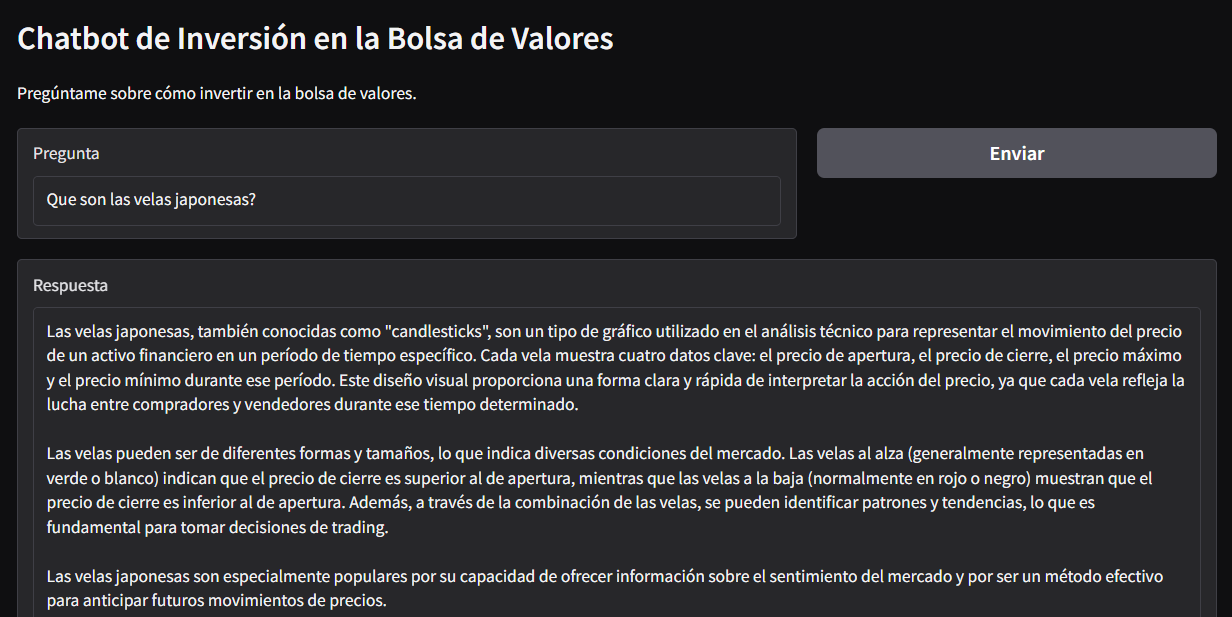


| Captura de pantalla #2 |
|---------------------|
| ![Screenshot 2025-06-22 230746.png](<attachment:Screenshot 2025-06-22 230746.png>) |
| Pregunta 2 |

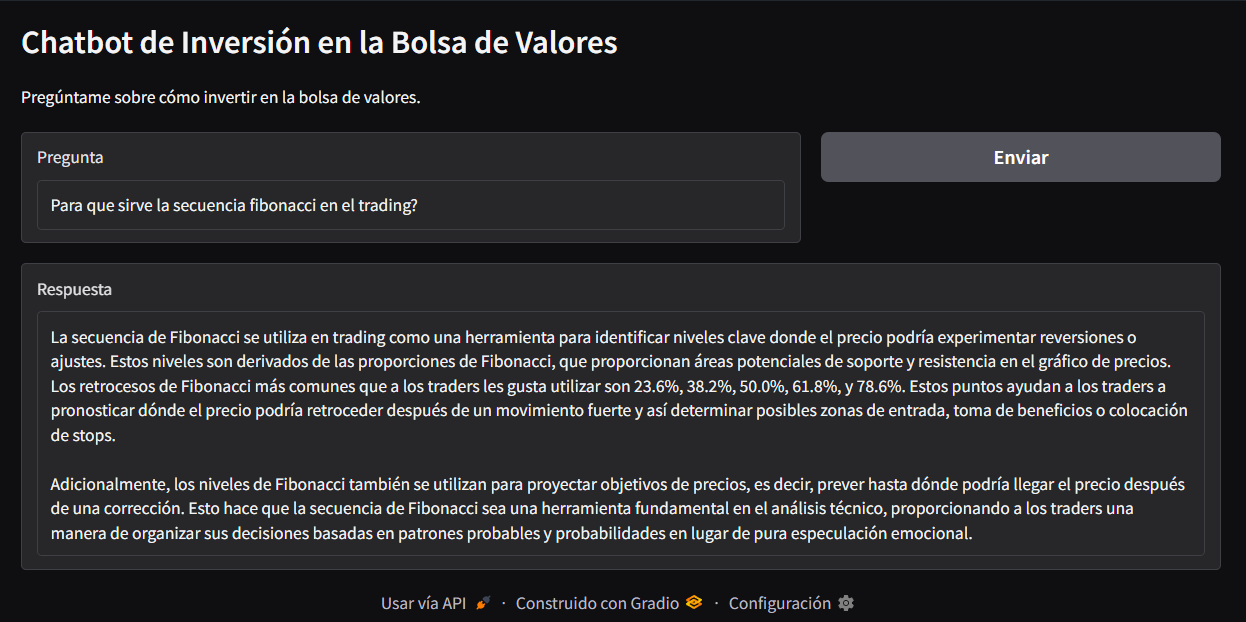


| Captura de pantalla #3 |
|---------------------|
| ![Screenshot 2025-06-22 231056.png](<attachment:Screenshot 2025-06-22 231056.png>) |
| Pregunta 3 |

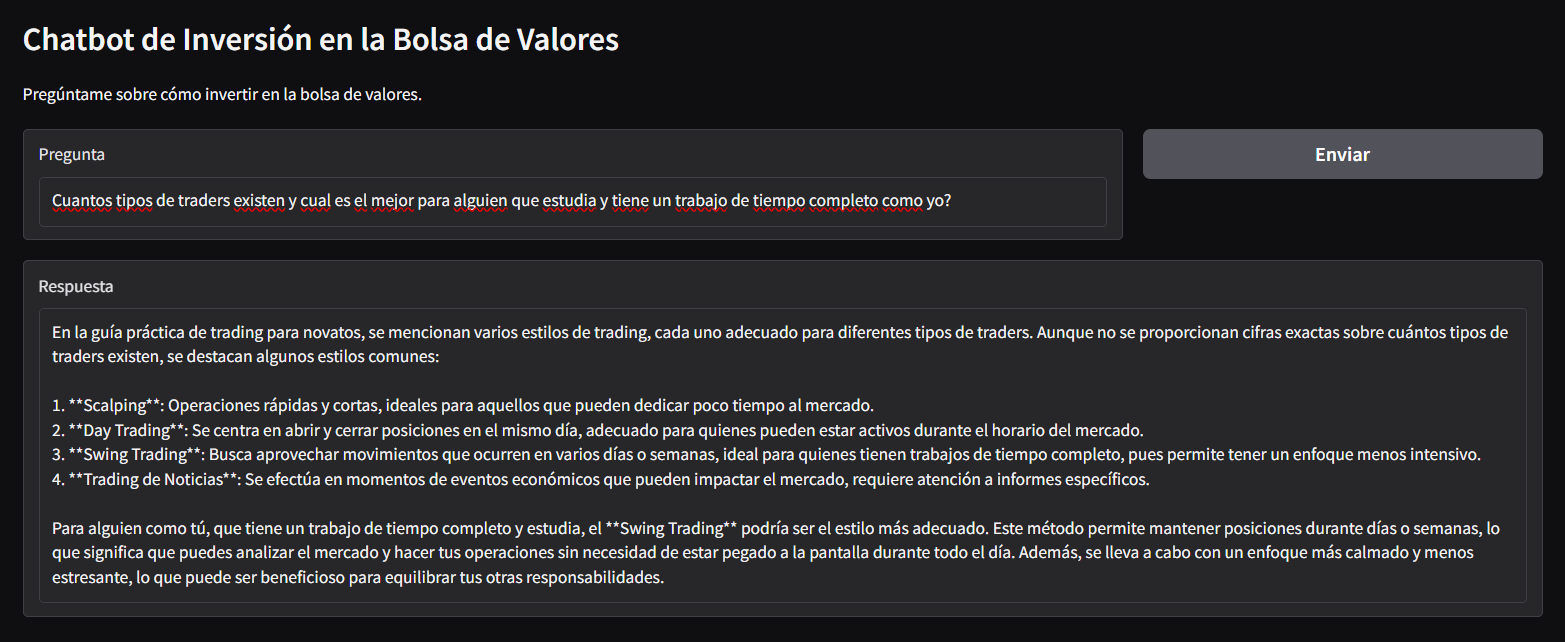

# **Conclusiones:**


El chatbot desarrollado es una herramienta efectiva para responder preguntas sobre inversión en la bolsa de valores utilizando un PDF como fuente de información.

Dicho PDF contiene información relevante y detallada sobre estrategias de inversión, análisis de mercado y otros temas útiles para los usuarios interesados en aprender sobre la bolsa de valores. Lo armamos de una colección de sitios con varios expertos en el tema.

Elegimos la integración del modelo de OpenAi principalmente para hacer uso de los recursos que pagamos en este curso. Ademas de aprovechar la velocidad y precisión del modelo GPT-4o-mini para generar respuestas de alta calidad. Todas las preguntas que le hicimos al modelo, respondió de forma coherente y sobre todo real, ya que no alucino en ninguna de ellas. 

La interfaz gráfica creada con Gradio fue muy fácil de implementar y nos permite interactuar fácilmente con el chatbot, haciendo preguntas y recibiendo respuestas de manera muy intuitiva.

En resumen, este chatbot es una herramienta valiosa para aquellos interesados en aprender sobre inversión en la bolsa de valores, proporcionando respuestas basadas en un documento informativo y facilitando el acceso a conocimientos clave en este campo.

El sistema RAG+LLM permite una interacción fluida y efectiva, combinando la recuperación de información con la generación de lenguaje natural para ofrecer respuestas precisas y útiles a las preguntas de los usuarios.

# **Fin de la actividad chatbot: LLM + RAG**